### IMPORT THE LIBRARIES 

In [1]:
from PIL import Image, ImageFilter
from skimage.feature import greycomatrix
import numpy as np
from matplotlib import pyplot as plt
import cv2 as c
import math

### For low intensity image

### OPEN THE IMAGE 

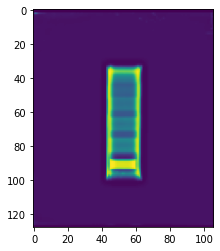

In [2]:
low_image = Image.open("X-Rays/84_60.bmp")
plt.imshow(low_image)

### FIND THE WIDTH AND HEIGHT OF THE IMAGE

In [3]:
width, height = low_image.size
print(width,height)

106 128


### CROP THE REGION OF INTEREST FROM THE IMAGE

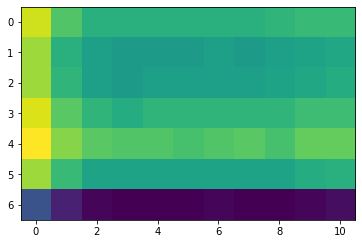

In [4]:
# left = 47
# top = 88.8
# right = 58
# bottom = 94
# low_cropped_img = low_image.crop((left,top,right,bottom))
# low_cropped_img.show()
# plt.imshow(low_cropped_img)

left = 47
top = 78
right = 58
bottom = 85
low_cropped_img = low_image.crop((left,top,right,bottom))
low_cropped_img.show()
plt.imshow(low_cropped_img)

### UNIQUE VALUES FROM AN ARRAY

In [5]:
np.unique(low_cropped_img)

array([ 70,  71,  72,  75,  84, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 115, 117, 121, 122, 125], dtype=uint8)

### AVERAGE PIXEL INTENSITY

In [6]:
low_avg_pixel_intensity = np.mean(low_cropped_img)
print(low_avg_pixel_intensity)

101.45454545454545


### For High intensity image

### OPEN THE IMAGE 

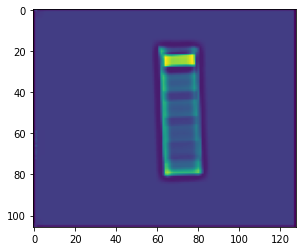

In [7]:
high_image = Image.open("X-Rays/111_120.bmp")
plt.imshow(high_image)

### FIND THE WIDTH AND HEIGHT OF THE IMAGE

In [8]:
width, height = high_image.size
print(width,height)

128 106


### CROP THE REGION OF INTEREST FROM THE IMAGE

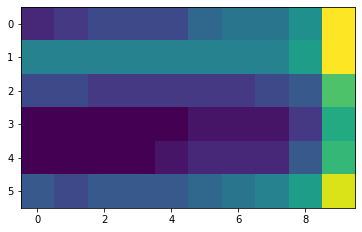

In [9]:
# left = 65
# top = 23
# right = 75
# bottom = 27
# high_cropped_img = high_image.crop((left,top,right,bottom))
# high_cropped_img.show()
# plt.imshow(high_cropped_img)

left = 67
top = 32
right = 77
bottom = 38
high_cropped_img = high_image.crop((left,top,right,bottom))
high_cropped_img.show()
plt.imshow(high_cropped_img)

### UNIQUE VALUES FROM AN ARRAY

In [10]:
np.unique(high_cropped_img)

array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 85, 86],
      dtype=uint8)

### AVERAGE PIXEL INTENSITY

In [11]:
high_avg_pixel_intensity = np.mean(high_cropped_img)
print(high_avg_pixel_intensity)

73.23333333333333


### Find K Value for Low Intensity

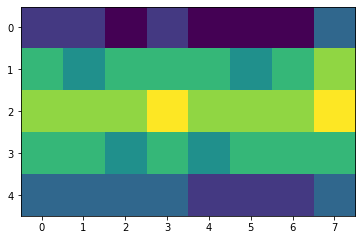

In [142]:
left = 50
top = 45
right = 58
bottom = 50
low_cropped_img = low_image.crop((left,top,right,bottom))
low_cropped_img.show()
plt.imshow(low_cropped_img)

In [143]:
k_low_avg_pixel_intensity = np.mean(low_cropped_img)
print(k_low_avg_pixel_intensity)

78.025


### Find K Value for High Intensity

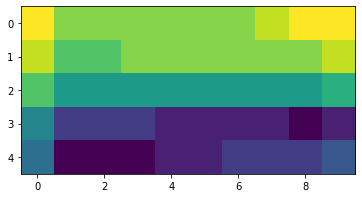

In [209]:
left = 67
top = 68
right = 77
bottom = 73
high_cropped_img = high_image.crop((left,top,right,bottom))
high_cropped_img.show()
plt.imshow(high_cropped_img)

In [210]:
k_high_avg_pixel_intensity = np.mean(high_cropped_img)
print(k_high_avg_pixel_intensity)

51.62


In [229]:
K = math.log(k_low_avg_pixel_intensity)/math.log(k_high_avg_pixel_intensity)
K

1.1047488858172603

In [230]:
mu_b_low = 0.2229

In [213]:
mu_b_high = 0.1785

In [214]:
low_avg_pixel_intensity

101.45454545454545

In [215]:
high_avg_pixel_intensity

73.23333333333333

In [216]:
math.log(low_avg_pixel_intensity)

4.6196108701428855

In [217]:
(K * math.log(high_avg_pixel_intensity))

4.743405816664142

In [218]:
math.log(high_avg_pixel_intensity)

4.293650690722455

In [253]:
print(math.log(low_avg_pixel_intensity))
print(K * math.log(high_avg_pixel_intensity))
Numerator = (math.log(low_avg_pixel_intensity)) - (1.07 * math.log(high_avg_pixel_intensity)) 
print(Numerator)

4.6196108701428855
4.743405816664142
0.025404631069858574


In [254]:
Denominator = mu_b_low - (K * mu_b_high)
print(Denominator)

0.025702323881619027


In [255]:
M_b = Numerator/Denominator

In [256]:
print(M_b)

0.9884176694243065


In [251]:
k_some = 0.1791/0.167

k_some = 0.1823/0.165

In [252]:
k_some

1.0724550898203593

In [73]:
Numerator = (math.log(low_avg_pixel_intensity)) - (1.0664 * math.log(high_avg_pixel_intensity))
print(Numerator)

0.04086177355645937


In [74]:
Denominator = mu_b_low - (k_some * mu_b_high)
print(Denominator)

0.02568454545454546


In [75]:
M_b = Numerator/Denominator

In [76]:
M_b

1.5909089623086148

In [62]:
0.02568454545454546 * 1.003

0.025761599090909092